#### __Heron's method of Square Roots__

Computers compute square roots, irrational numbers as approximation. There's also a symbolic wayt to deal with this, as we know (using sympy e.g.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display, Math


$$ 
\sqrt{Y}=X \qquad Y = X^2\newline
Y = (x + \epsilon)^2 \newline
Y = x^2 + 2x\epsilon + \epsilon^2\newline

\epsilon \approx \frac{Y-x^2}{2x}\newline

X \approx x + \frac{Y-x^2}{2x}\newline

X \approx \frac{x + \frac{Y}{x}}{2} \hspace{30mm}
$$

<br>

So we __iteratively__ are going to be closer and closer while increasing epsilon which is relatively small compared to Y

EXERCISE

/var/folders/0r/r1g3n1k91rj2y9473jt0d9sh0000gn/T/ipykernel_22139/2253744127.py:15: RuntimeWarning: divide by zero encountered in log
  error = -np.log(np.abs(x_approx-np.sqrt(Y)))


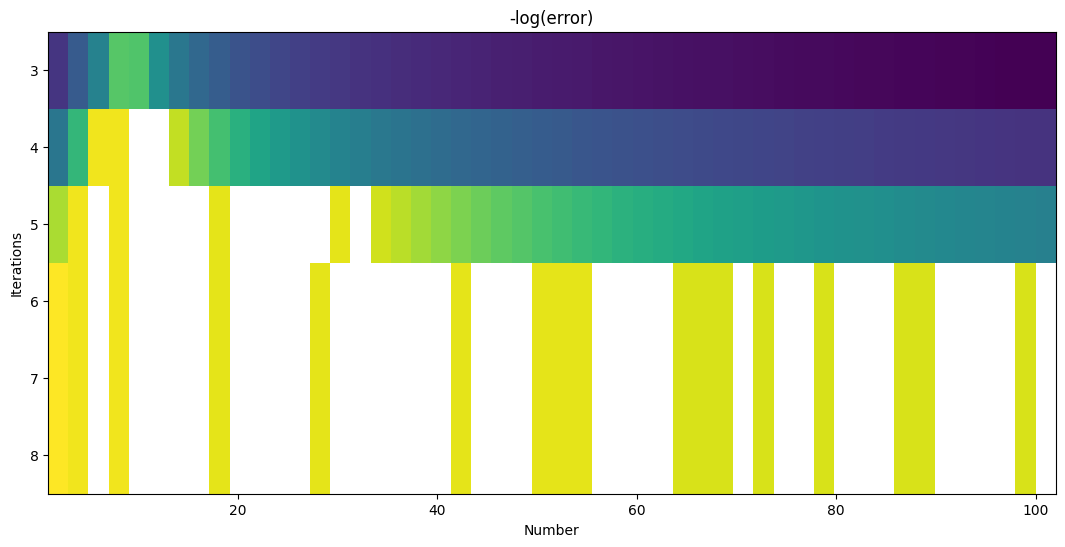

In [130]:
Y_steps_num = 50
Ys = np.linspace(2, 101, Y_steps_num)

heron_iterations_num = 8

A = np.zeros([heron_iterations_num, Y_steps_num])
B = np.zeros([heron_iterations_num, Y_steps_num])

for Y_idx, Y in enumerate(Ys):
    x_approx = Y/3 # as a first guess
    x_approx_col = []
    error_col = []
    for iter in range(1, heron_iterations_num+1):
        x_approx = (x_approx + Y/x_approx) / 2
        error = -np.log(np.abs(x_approx-np.sqrt(Y)))
    
        # print(f'{iter}. Best approximation: {np.round(x_approx, 3)}. Error: {np.round(error, 3)}. Numpy result: {np.round(np.sqrt(Y), 3)}')
        x_approx_col.append(x_approx)
        error_col.append(error)
    
    # print(f"Y={Y}. {x_approx_col}")
    A[:, Y_idx] = np.array(x_approx_col)
    B[:, Y_idx] = np.array(error_col)

# display(Math(sym.latex(sym.sympify(np.round(A, 3)))))
# display(Math(sym.latex(sym.sympify(np.round(B, 3)))))

plt.pcolormesh(Ys, np.arange(3, heron_iterations_num+1), B[2:])

plt.xlabel('Number')
plt.ylabel('Iterations')
plt.title('-log(error)')
plt.gca().invert_yaxis()

plt.gcf().set_size_inches(13, 6)
plt.show()



In [20]:
# Let's say we want to find an approximation of 10^0.5
# 1) Let's find the integer that squared is smaller than 10 (=3)
# 2) Let's use herons formula to find the first approximation
# 3) Let's do some more iterations

Y = 1235799.57789

# squares_tries = np.arange(1000) # max limit= 1M

x_approx = 0

while x_approx**2 < Y:
    x_approx+=1

x_approx -= 1 # we've found the number that is squared higher, so we need to go backward once
print(f'Zeroeth approx: {x_approx}')

for iter in range(1, 9):
    x_approx = (x_approx + Y/x_approx) / 2
    error = np.abs(x_approx-np.sqrt(Y))
    print(f'{iter}. Best approximation: {np.round(x_approx, 3)}. Error: {np.round(error, 3)}. Numpy result: {np.round(np.sqrt(Y), 3)}')




Zeroeth approx: 1111
1. Best approximation: 1111.665. Error: 0.0. Numpy result: 1111.665
2. Best approximation: 1111.665. Error: 0.0. Numpy result: 1111.665
3. Best approximation: 1111.665. Error: 0.0. Numpy result: 1111.665
4. Best approximation: 1111.665. Error: 0.0. Numpy result: 1111.665
5. Best approximation: 1111.665. Error: 0.0. Numpy result: 1111.665
6. Best approximation: 1111.665. Error: 0.0. Numpy result: 1111.665
7. Best approximation: 1111.665. Error: 0.0. Numpy result: 1111.665
8. Best approximation: 1111.665. Error: 0.0. Numpy result: 1111.665
